In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import tsfresh as ts

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<h3>Data Preparation:</h3>

<h4>Definition der Dataframes:</h4>

Einlesen der Dateien als Dataframes aufgeteilt nach verschiedenen Sensoren (Accelerometer, Gyroscope, Orientation, Gravity)

Datenaufzeichnung mit Aktivitäten des alltäglichen Lebens: -> Aufteilung in einen Dataframe mit Label "df_walk"
- Laufen
- Treppe hoch
- Treppe runter
- auf Stuhl setzen
- Ins Bett legen

Fallen: (-> Aufteilung in einen Dataframe mit Label "df_fall")
- aus dem Laufen stürzen
- aus dem Stehen stürzen
- aus dem Sitzen stürzen



In [2]:
df = []
#all_filenames = ["data/laufen_normal1.json", "data/treppe_hoch1.json", "data/treppe_runter1.json", "data/bett_setzen1.json", "data/hinsetzen1.json"]   
all_filenames = ["data/treppe_hoch1.json",
"data/treppe_hochlaufen_Paul.json",
"data/treppe_runter1.json",
"data/treppe_runterlaufen_Paul.json",
"data/TreppeHochlaufen_Anitan.json",
"data/TreppeRunterlaufen_Anitan.json",
"data/bett_setzen_Paul.json",
"data/bett_setzen1.json",
"data/BettLegen_Anitan.json",
"data/Hinsetzen_Anitan.json",
"data/hinsetzen_Paul.json",
"data/hinsetzen1.json",
"data/Laufen_Anitan.json",
"data/laufen_normal_Paul.json",
"data/laufen_normal1.json"]

for filename in all_filenames:
    df_walk = pd.read_json(filename)
    df.append(df_walk)

#df[1]

df_walk = pd.concat(df)
#print(df)
#df_walk = pd.read_json("data/laufen_normal1.json") + pd.read_json("data/treppe_hoch1.json") + pd.read_json("data/treppe_runter1.json") + pd.read_json("data/bett_setzen1.json") + pd.read_json("data/hinsetzen1.json")

df_f = []
all_filenames_f = ["data/SturzStehen5_Anitan.json",
"data/SturzStehen6_Anitan.json",
"data/SturzStehen7_Anitan.json",
"data/SturzStehen8_Anitan.json",
"data/SturzStehen9_Anitan.json",
"data/SturzStehen10_Anitan.json",
"data/laufen_fall1.json",
"data/laufen_fall2.json",
"data/laufen_fall3.json",
"data/laufen_fall4.json",
"data/laufen_fall5.json",
"data/laufen_fall6.json",
"data/laufen_fall7.json",
"data/laufen_fall8.json",
"data/laufen_fall9.json",
"data/laufen_fall10.json",
"data/sitzen_fall_Paul_1.json",
"data/sitzen_fall_Paul_2.json",
"data/sitzen_fall_Paul_3.json",
"data/sitzen_fall_Paul_4.json",
"data/sitzen_fall_Paul_5.json",
"data/sitzen_fall_Paul_6.json",
"data/sitzen_fall_Paul_7.json",
"data/sitzen_fall_Paul_8.json",
"data/sitzen_fall_Paul_9.json",
"data/sitzen_fall_Paul_10.json",
"data/SturzStehen1_Anitan.json",
"data/SturzStehen2_Anitan.json",
"data/SturzStehen3_Anitan.json",
"data/SturzStehen4_Anitan.json"]   

for filename in all_filenames_f:
    df_fall= pd.read_json(filename)
    df_f.append(df_fall)

#df_f[1]

df_fall = pd.concat(df_f)


#df_fall = pd.read_json("data/laufen_fall1.json") + pd.read_json("data/laufen_fall2.json") + pd.read_json("data/laufen_fall3.json") + pd.read_json("data/laufen_fall4.json") + pd.read_json("data/laufen_fall5.json") + pd.read_json("data/laufen_fall6.json") + pd.read_json("data/laufen_fall7.json") + pd.read_json("data/laufen_fall8.json") + pd.read_json("data/laufen_fall9.json") + pd.read_json("data/laufen_fall10.json")

In [3]:
df_walk

,sensor,time,seconds_elapsed,z,y,x,version,device name,recording time,platform,...,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
0,Accelerometer,1.684489e+18,-594472.914195,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AccelerometerUncalibrated,1.685083e+18,0.008903,-1.047058,0.178375,0.291534,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AccelerometerUncalibrated,1.685083e+18,0.018967,-1.212357,0.241196,0.407150,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AccelerometerUncalibrated,1.685083e+18,0.029031,-1.180695,0.221848,0.324646,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AccelerometerUncalibrated,1.685083e+18,0.039094,-0.879486,0.083313,0.317947,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,GyroscopeUncalibrated,1.685083e+18,31.189391,0.456452,0.298920,0.213691,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6203,GyroscopeUncalibrated,1.685083e+18,31.199455,0.351914,0.359441,0.112437,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6204,GyroscopeUncalibrated,1.685083e+18,31.209519,0.271619,0.357680,0.017966,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6205,Metadata,NaN,NaN,NaN,NaN,NaN,3.0,iPhone 13 Pro,2023-05-26_06-37-02,ios,...,87dcec7c-b9f6-41cd-93ba-498cba653a5e,Accelerometer|Gravity|Gyroscope|Orientation|An...,5|5|5|5||5|5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Veranschaulichung exemplarischer Dataframes:

Auswahl der relevanten Spalten/ Informationen aus dem Datensatz

In [4]:
df_walk.columns

Index(['sensor', 'time', 'seconds_elapsed', 'z', 'y', 'x', 'version',
       'device name', 'recording time', 'platform', 'appVersion', 'device id',
       'sensors', 'sampleRateMs', 'yaw', 'qx', 'qz', 'roll', 'qw', 'qy',
       'pitch'],
      dtype='object')

Umrechnung der Zeit aus Sekunden in einen Zeitstempel:

In [5]:
#preprocessing data
df_walk['time'] = pd.to_datetime(df_walk['time'])
df_fall['time'] = pd.to_datetime(df_fall['time'])
#df_testFall['time'] = pd.to_datetime(df_testFall['time'])

df_walk.head()

,sensor,time,seconds_elapsed,z,y,x,version,device name,recording time,platform,...,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
0,Accelerometer,2023-05-19 09:29:49.910805504,-594472.914195,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AccelerometerUncalibrated,2023-05-26 06:37:42.833902592,0.008903,-1.047058,0.178375,0.291534,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AccelerometerUncalibrated,2023-05-26 06:37:42.843966464,0.018967,-1.212357,0.241196,0.407150,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AccelerometerUncalibrated,2023-05-26 06:37:42.854030592,0.029031,-1.180695,0.221848,0.324646,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AccelerometerUncalibrated,2023-05-26 06:37:42.864094464,0.039094,-0.879486,0.083313,0.317947,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Index als Zeitstempel definiert:

In [6]:
df_walk = df_walk.set_index('time')
df_fall = df_fall.set_index('time')
#df_testFall = df_testFall.set_index('time')

Ausgabe aller Sensoren, die in Datensatz vorhanden sind:

In [7]:
df_walk['sensor'].unique()

array(['Accelerometer', 'AccelerometerUncalibrated', 'Gravity',
       'Gyroscope', 'GyroscopeUncalibrated', 'Metadata', 'Orientation'],
      dtype=object)

In [8]:
df_fall['sensor'].unique()

array(['Accelerometer', 'AccelerometerUncalibrated', 'Gravity',
       'Gyroscope', 'GyroscopeUncalibrated', 'Metadata', 'Orientation'],
      dtype=object)

Quick Fix der SensorBezeichner:

Aufteilung der Daten nach den zu betrachtenden Sensoren:

In [9]:
df_walk_acc = df_walk[df_walk['sensor'] == 'AccelerometerUncalibrated']
df_fall_acc = df_fall[df_fall['sensor'] == 'AccelerometerUncalibrated']
#df_testFall_acc = df_testFall[df_testFall['sensor'] == 'AccelerometerUncalibrated']

df_walk_gyro = df_walk[df_walk['sensor'] == 'GyroscopeUncalibrated']
df_fall_gyro = df_fall[df_fall['sensor'] == 'GyroscopeUncalibrated']
#df_testFall_gyro = df_testFall[df_testFall['sensor'] == 'GyroscopeUncalibrated']

df_walk_or = df_walk[df_walk['sensor'] == 'Orientation']
df_fall_or = df_fall[df_fall['sensor'] == 'Orientation']
#df_testFall_or = df_testFall[df_testFall['sensor'] == 'Orientation']


Beschreiben des Datensatzes:

In [10]:
df_fall_or.describe()

,seconds_elapsed,z,y,x,version,yaw,qx,qz,roll,qw,qy,pitch
count,4777.000000,0.0,0.0,0.0,0.0,4777.000000,4777.000000,4777.000000,4777.000000,4777.000000,4777.000000,4777.000000
mean,-2097.042484,NaN,NaN,NaN,NaN,0.929666,-0.034768,-0.485561,0.682097,-0.624994,-0.368007,0.436815
std,32923.273111,NaN,NaN,NaN,NaN,0.803829,0.171346,0.210302,0.929821,0.275420,0.288781,0.367524
min,-593318.402898,NaN,NaN,NaN,NaN,-3.139099,-0.385636,-0.937325,-2.015256,-0.980936,-0.986526,-0.490662
25%,1.198567,NaN,NaN,NaN,NaN,0.617717,-0.159978,-0.586035,0.043657,-0.837685,-0.630635,0.199308
50%,2.387494,NaN,NaN,NaN,NaN,1.002127,-0.051245,-0.497403,0.352358,-0.756318,-0.257328,0.398383
75%,3.710605,NaN,NaN,NaN,NaN,1.229881,0.073786,-0.379658,1.247419,-0.404543,-0.137682,0.688459
max,7.078800,NaN,NaN,NaN,NaN,3.123546,0.543837,0.249104,3.006693,0.152799,0.184525,1.507177


Auswahl der relevanten Spalten aus den Dataframes der nach Sensordaten:

-> Hier wurden die Werte z,x,y aus den Gyro Sensoren in z_ umbenannt, um später für den join der Tabellen eindeutige Spalten zu erzeugen

In [11]:
df_walk_acc = df_walk_acc[['z','x','y']]
df_fall_acc = df_fall_acc[['z','x','y']]
#df_testFall_acc = df_testFall_acc[['z','x','y']]

df_walk_gyro = df_walk_gyro[['z','x','y']]
df_fall_gyro = df_fall_gyro[['z','x','y']]
#df_testFall_gyro = df_testFall_gyro[['z','x','y']]

df_walk_or = df_walk_or[['qx','qz','qw','qy']]
df_fall_or = df_fall_or[['qx','qz','qw','qy']]
#df_testFall_or = df_testFall_or[['qx','qz','qw','qy']]

df_walk_gyro.rename(columns={ 'z': 'gz' , 'x': 'gx' , 'y': 'gy'}, inplace=True)
df_fall_gyro.rename(columns={ 'z': 'gz' , 'x': 'gx' , 'y': 'gy'}, inplace=True)


Plot der Dataframes zur Kontrolle und Veranschaulichung der Werte:

<Axes: xlabel='time'>

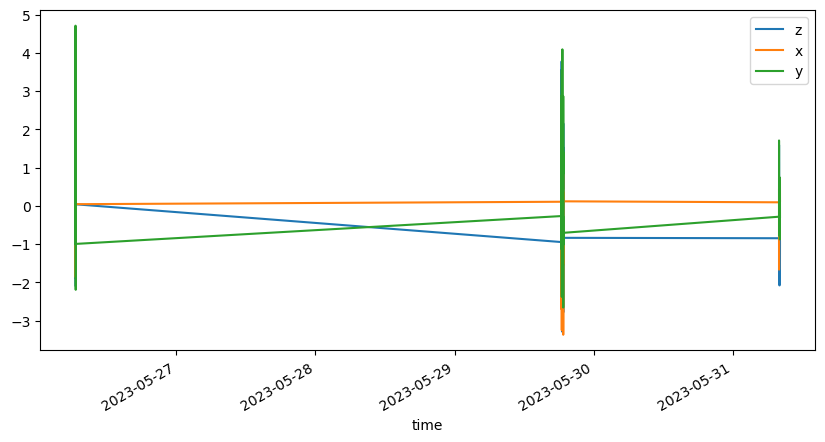

In [12]:
df_walk_acc.plot(figsize=(10,5))

<Axes: xlabel='time'>

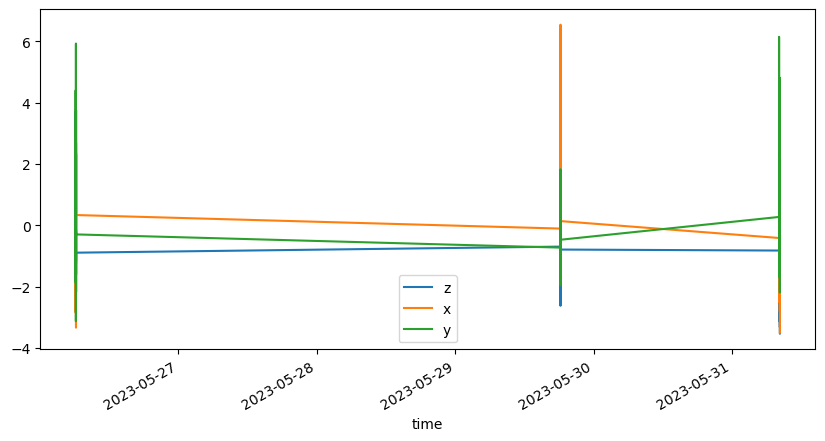

In [13]:
df_fall_acc.plot(figsize=(10,5))

In [14]:
#df_testFall_acc.plot(figsize=(10,5))

<Axes: xlabel='time'>

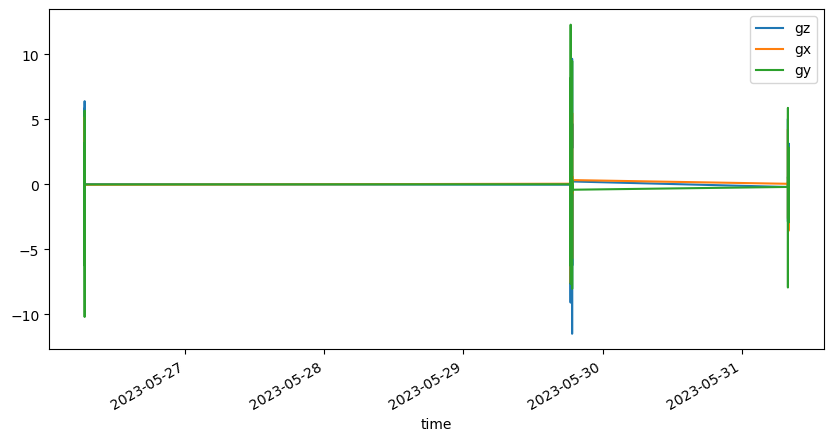

In [15]:
df_walk_gyro.plot(figsize=(10,5))

<Axes: xlabel='time'>

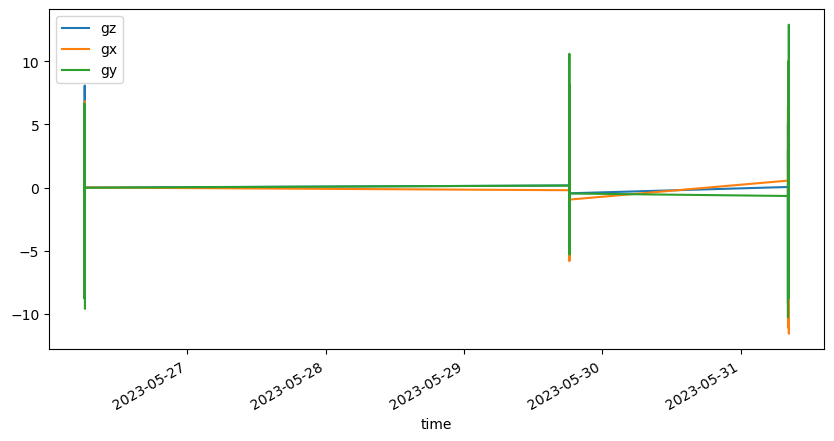

In [16]:
df_fall_gyro.plot(figsize=(10,5))

Vergabe von Labels auf der Basis des Dataframe Ursprungs (Einteilung in Walk und Fall):

-> Verbinden der verschiedenen DataFrames nach Sensoren zu einem kombinierten Dataframe

In [17]:
df_walk_acc['label'] = "walk"
df_fall_acc['label'] = "fall"

df_walk_gyro['label'] = "walk"
df_fall_gyro['label'] = "fall"

df_walk_or['label'] = "walk"
df_fall_or['label'] = "fall"

#df_testFall_acc['label'] = "fall"
#df_testFall_gyro['label'] = "fall"
#df_testFall_or['label'] = "fall"

df_combined_walk = pd.merge(df_walk_acc, df_walk_gyro, on='time')
df_combined_fall = pd.merge(df_fall_acc, df_fall_gyro, on='time')

Check der kombinierten DataFrames:

In [18]:
df_combined_walk.describe()

,z,x,y,gz,gx,gy
count,57221.000000,57221.000000,57221.000000,57221.000000,57221.000000,57221.000000
mean,-0.333632,-0.199962,0.311966,-0.011333,-0.010677,0.000796
std,0.556202,0.603105,0.572698,1.106941,0.922804,1.173258
min,-3.296600,-3.370483,-2.658630,-11.497366,-7.573780,-10.203156
25%,-0.854248,-0.614655,-0.160934,-0.353579,-0.390227,-0.429236
50%,-0.277115,-0.120926,0.264145,0.000402,-0.004447,0.002577
75%,0.007278,0.145859,0.726624,0.454289,0.416828,0.387609
max,3.779816,2.563126,4.711624,9.654192,5.887855,12.278822


In [19]:
df_combined_fall.head(-5)

,z,x,y,label_x,gz,gx,gy,label_y
time,,,,,,,,
2023-05-31 08:18:15.256858624,-0.920166,-0.175568,-0.006378,fall,0.191907,-0.164681,0.130058,fall
2023-05-31 08:18:15.266892544,-0.918854,-0.184113,0.009521,fall,0.181802,-0.222109,0.169581,fall
2023-05-31 08:18:15.276927488,-0.921509,-0.181549,0.017181,fall,0.146521,-0.246877,0.204709,fall
2023-05-31 08:18:15.286962432,-0.910995,-0.174088,0.032059,fall,0.104187,-0.226433,0.204051,fall
2023-05-31 08:18:15.296996608,-0.898178,-0.169342,0.039551,fall,0.039253,-0.179944,0.154899,fall
...,...,...,...,...,...,...,...,...
2023-05-31 08:12:51.320419584,0.086273,0.497681,-0.858246,fall,-0.000016,-0.006920,0.016283,fall
2023-05-31 08:12:51.330453760,0.087509,0.502808,-0.866867,fall,-0.016699,-0.008870,0.028089,fall
2023-05-31 08:12:51.340487424,0.086151,0.509659,-0.869995,fall,-0.006166,-0.009790,0.018600,fall


Bestimmung der Länge der Datensätze:

In [20]:
df_help = df_combined_walk.reset_index()
print(df_help.iloc[-1,0] - df_help.iloc[0,0])

-1 days +23:59:51.149616128


Ausschluss der Spalte "label_x" da redundant: 

In [21]:
df_combined_walk.drop('label_x',axis=1, inplace=True)
df_combined_fall.drop('label_x',axis=1, inplace=True)

Überprüfen der Vollständigkeit des Datensatzes:

In [22]:
laenge = len(df_walk_acc) + len(df_walk_gyro)
print("Doppelte Zeilen in Dataframes, ohne join auf Time:", laenge)
print("Einfache Anzahl an Zeilen, bei richtigem Merge:",len(df_combined_walk))
print("Länge des Merges:", len(df_combined_walk))

Doppelte Zeilen in Dataframes, ohne join auf Time: 126452
Einfache Anzahl an Zeilen, bei richtigem Merge: 57221
Länge des Merges: 57221


Aufteilen der DF's in einzelne Abschnitte mit den Abständen 100 Datenpunkte:
- ToDo: Anpassen der Länge von Sequenzen und deren Auswirkung auf die Modellgüte/ Accuracy

In [23]:
df_combined_walk['id'] = 0
df_combined_fall['id'] = 0

id = 1

var1 = 100
var2 = 100

for i in range(0, len(df_combined_walk)):
    df_combined_walk.iloc[i,7] = id
    

    if i >= var1: 
        var1 = var1 + 100
        id+=1

id +=1

for i in range(0, len(df_combined_fall)):
    
    df_combined_fall.iloc[i,7] = id

    if i >= var2: 
        var2 = var2 + 100
        id+=1  

In [24]:
df_combined_walk

,z,x,y,gz,gx,gy,label_y,id
time,,,,,,,,
2023-05-26 06:37:42.833902592,-1.047058,0.291534,0.178375,-0.263552,0.507319,0.535352,walk,1
2023-05-26 06:37:42.843966464,-1.212357,0.407150,0.241196,-0.173753,0.448504,1.262902,walk,1
2023-05-26 06:37:42.854030592,-1.180695,0.324646,0.221848,-0.207313,0.499369,1.184612,walk,1
2023-05-26 06:37:42.864094464,-0.879486,0.317947,0.083313,-0.342356,0.576045,1.050569,walk,1
2023-05-26 06:37:42.874157312,-1.037720,0.291595,-0.001038,-0.504457,0.673152,1.207420,walk,1
...,...,...,...,...,...,...,...,...
2023-05-26 06:37:33.943262976,-0.894089,0.243195,0.134171,0.647651,0.389635,-0.020721,walk,573
2023-05-26 06:37:33.953326848,-0.885330,0.211731,0.114243,0.558845,0.308481,0.166195,walk,573
2023-05-26 06:37:33.963390720,-0.880737,0.197052,0.087601,0.456452,0.213691,0.298920,walk,573


In [25]:
df_combined_fall

,z,x,y,gz,gx,gy,label_y,id
time,,,,,,,,
2023-05-31 08:18:15.256858624,-0.920166,-0.175568,-0.006378,0.191907,-0.164681,0.130058,fall,574
2023-05-31 08:18:15.266892544,-0.918854,-0.184113,0.009521,0.181802,-0.222109,0.169581,fall,574
2023-05-31 08:18:15.276927488,-0.921509,-0.181549,0.017181,0.146521,-0.246877,0.204709,fall,574
2023-05-31 08:18:15.286962432,-0.910995,-0.174088,0.032059,0.104187,-0.226433,0.204051,fall,574
2023-05-31 08:18:15.296996608,-0.898178,-0.169342,0.039551,0.039253,-0.179944,0.154899,fall,574
...,...,...,...,...,...,...,...,...
2023-05-31 08:12:51.370590464,0.087753,0.500275,-0.869568,0.039931,-0.006649,-0.018128,fall,810
2023-05-31 08:12:51.380624640,0.091812,0.492447,-0.862762,0.031805,0.007002,-0.000123,fall,810
2023-05-31 08:12:51.390658560,0.093460,0.494492,-0.855667,0.013889,0.025644,0.013657,fall,810


Konkatenieren der verschiedenen Dataframes zu einem gemeinsamen DF:

In [26]:
df_combined = pd.concat([df_combined_walk, df_combined_fall])

In [27]:
df_combined.head(16807)

,z,x,y,gz,gx,gy,label_y,id
time,,,,,,,,
2023-05-26 06:37:42.833902592,-1.047058,0.291534,0.178375,-0.263552,0.507319,0.535352,walk,1
2023-05-26 06:37:42.843966464,-1.212357,0.407150,0.241196,-0.173753,0.448504,1.262902,walk,1
2023-05-26 06:37:42.854030592,-1.180695,0.324646,0.221848,-0.207313,0.499369,1.184612,walk,1
2023-05-26 06:37:42.864094464,-0.879486,0.317947,0.083313,-0.342356,0.576045,1.050569,walk,1
2023-05-26 06:37:42.874157312,-1.037720,0.291595,-0.001038,-0.504457,0.673152,1.207420,walk,1
...,...,...,...,...,...,...,...,...
2023-05-29 18:30:59.427516416,-0.177124,0.197601,0.578400,1.064945,1.293874,-0.517764,walk,169
2023-05-29 18:30:59.437484288,-0.110153,0.125824,0.687164,1.031122,1.211612,-0.590242,walk,169
2023-05-29 18:30:59.447452416,0.062943,0.009567,0.902405,0.777019,0.385325,-1.063987,walk,169


Check auf Nullwerte:

In [28]:
df_combined.isnull().sum()

z          0
x          0
y          0
gz         0
gx         0
gy         0
label_y    0
id         0
dtype: int64

In [29]:
df_combined.reset_index(inplace=True)
df_combined.head()

,time,z,x,y,gz,gx,gy,label_y,id
0,2023-05-26 06:37:42.833902592,-1.047058,0.291534,0.178375,-0.263552,0.507319,0.535352,walk,1
1,2023-05-26 06:37:42.843966464,-1.212357,0.407150,0.241196,-0.173753,0.448504,1.262902,walk,1
2,2023-05-26 06:37:42.854030592,-1.180695,0.324646,0.221848,-0.207313,0.499369,1.184612,walk,1
3,2023-05-26 06:37:42.864094464,-0.879486,0.317947,0.083313,-0.342356,0.576045,1.050569,walk,1
4,2023-05-26 06:37:42.874157312,-1.037720,0.291595,-0.001038,-0.504457,0.673152,1.207420,walk,1


In [30]:
df_combined.replace(['walk'],0,inplace=True)
df_combined.replace(['fall'],1,inplace=True)
df_combined.head()

,time,z,x,y,gz,gx,gy,label_y,id
0,2023-05-26 06:37:42.833902592,-1.047058,0.291534,0.178375,-0.263552,0.507319,0.535352,0,1
1,2023-05-26 06:37:42.843966464,-1.212357,0.407150,0.241196,-0.173753,0.448504,1.262902,0,1
2,2023-05-26 06:37:42.854030592,-1.180695,0.324646,0.221848,-0.207313,0.499369,1.184612,0,1
3,2023-05-26 06:37:42.864094464,-0.879486,0.317947,0.083313,-0.342356,0.576045,1.050569,0,1
4,2023-05-26 06:37:42.874157312,-1.037720,0.291595,-0.001038,-0.504457,0.673152,1.207420,0,1


Berechnen der extracted_features mit tsfresh: 

from tsfresh import extract_features
extracted_features = extract_features(df_combined, column_id="id",column_sort='time')

Ausgeben der errechneten Features mittels TsFresh:

In [31]:
#extracted_features

In [32]:
labels= df_combined[['id','label_y']]
labels= labels.drop_duplicates()
labels= labels.set_index('id')
y= labels.iloc[:,0]
y.duplicated().sum()

print(y)


id
1      0
2      0
3      0
4      0
5      0
      ..
806    1
807    1
808    1
809    1
810    1
Name: label_y, Length: 810, dtype: int64


ACHTUNG: select_features vs. extract_relevant_features Unterschied ermitteln, Recherche

Features_filtered wird nicht weiter benutzt

from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
#test
impute(extracted_features)
features_filtered = select_features(extracted_features,y)

In [33]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(df_combined,y,
                                                     column_id='id', column_sort='time')

Feature Extraction: 100%|██████████| 10/10 [08:40<00:00, 52.10s/it]


features_filtered.columns

In [77]:
x_features=features_filtered_direct.iloc[:,111:]

In [80]:
list=[]
list.append(x_features.columns)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(x_features, y, test_size=0.30, random_state=101)

In [85]:
y_test

id
564    0
333    0
142    0
674    1
197    0
      ..
147    0
762    1
539    0
498    0
181    0
Name: label_y, Length: 243, dtype: int64

In [86]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

In [87]:
#Test via Konfusionsmatrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[151  20]
 [ 31  41]]


In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
#randomforest
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

#Test via Konfusionsmatrix
dm = confusion_matrix(y_test, y_pred)
print(dm)

[[161  10]
 [ 20  52]]


Speichern des Modells mit Pickle:

In [82]:
import pickle 

knnPickle = open('knnpickle_file', 'wb')
rfPickle = open('rfpickle_file', 'wb')
featuresList = open('featuresList_file', 'wb')

pickle.dump(knn,knnPickle)
pickle.dump(rf, rfPickle)
pickle.dump(list,featuresList)

knnPickle.close()
rfPickle.close()
featuresList.close()